# Exercise for UML

# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv

# Part 1

## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



## Exercises Part 1

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import altair as alt
import pygwalker as pyg # this is installed in the terminal as well
# %pip install pygwalker -q
import matplotlib.pyplot as plt

In [2]:
# Import the dataset. 

## Define the URL of the dataset
url = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv"

## Use Pandas to read the dataset into a DataFrame
data = pd.read_csv(url)

## Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# Understand the dataset. What columns are available?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# We can also get the columns by running this code
columns = data.columns
print("Columns available in the dataset:")
for column in columns:
    print(column)

Columns available in the dataset:
Unnamed: 0
track_id
artists
album_name
track_name
popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


In [5]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
# To generate descriptive statistics, use .describe funktion.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [7]:
# To see the count number of distinct elements in specified axis:
data.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [8]:
# Drop unused column
data_sort = data.drop(['Unnamed: 0'], axis=1)

In [9]:
# Check for missing values. How would you handle them?
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
missing_values

# There are null values (missing values) in three different columns 'artists', 'album_name' and 'track_name'.

Missing values in the dataset:


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
# To show the columns which have missing values print this code
missing_values = data.isna().any()
missing_values[missing_values].index.tolist()

['artists', 'album_name', 'track_name']

In [11]:
# The way to handle them is to use dropna metode.
data = data_sort.dropna()

In [12]:
# Search of duplicate rows
# This code calculates and returns the count of duplicate rows in the df based on the 'track_id' column.
data_sort.duplicated(subset=['track_id']).count()

114000

In [13]:
# Print for which rows we have duplicates
duplicates = data_sort[data_sort.duplicated(subset=['track_id'], keep=False)]

if duplicates.empty:
    print("No duplicate track_ids found.")
else:
    print("Duplicate track_ids found:")
    print(duplicates['track_name'])

Duplicate track_ids found:
0                                Comedy
1                      Ghost - Acoustic
5                  Days I Will Remember
6                         Say Something
7                             I'm Yours
                      ...              
113572         Jesus We Love You - Live
113605    In The Ordinary - Spontaneous
113617                 King of My Heart
113619                           Simple
113641                           Closer
Name: track_name, Length: 40900, dtype: object


In [14]:
# Drop the duplicates in 'track_id' column
data_sort.drop_duplicates(subset=['track_id'], inplace=True)

In [15]:
# Setting teh sorted data as our primary df
df = data_sort

In [16]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [17]:
# See the row which have NA
df[df['artists'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [18]:
# Drop NA in the selected columns
df = df.dropna(subset=['artists', 'album_name', 'track_name'])


In [19]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [20]:
# Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
popularity

track_genre
k-pop             59.423581
pop-film          59.096933
metal             56.422414
chill             53.738683
latino            51.788945
                    ...    
detroit-techno    11.130753
latin              9.855072
jazz               9.790076
romance            3.549779
iranian            2.224696
Name: popularity, Length: 113, dtype: float64

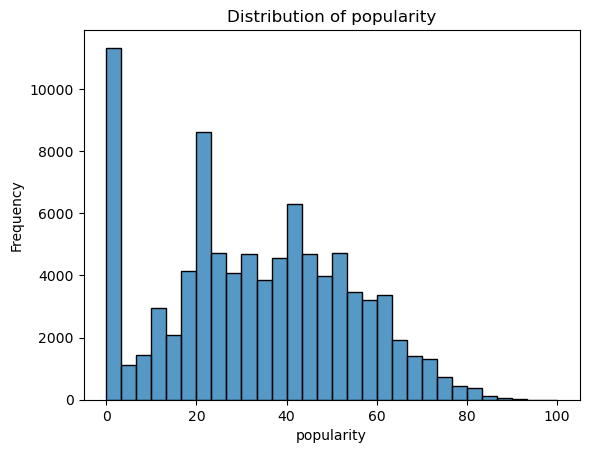

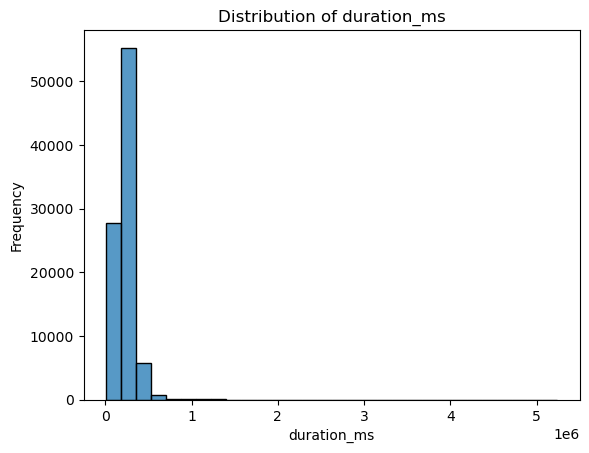

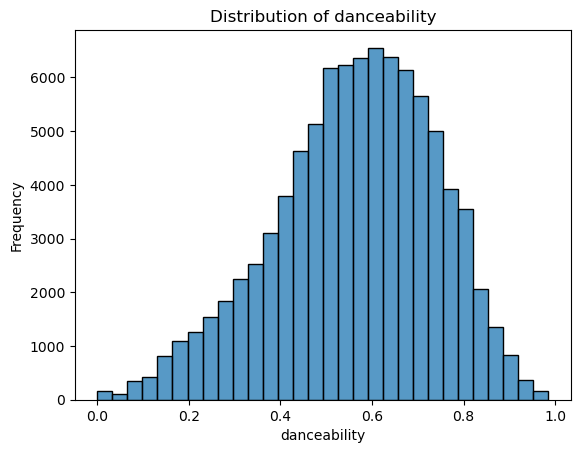

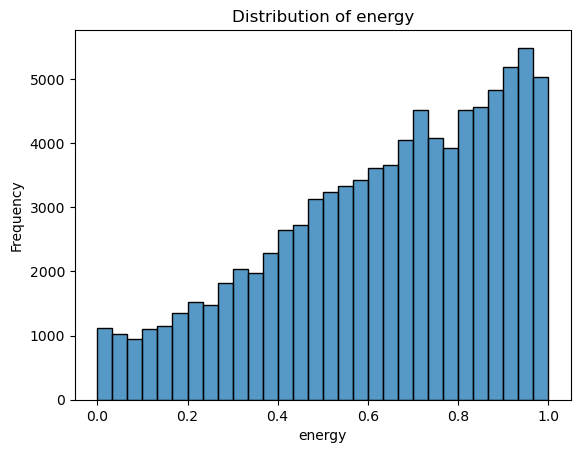

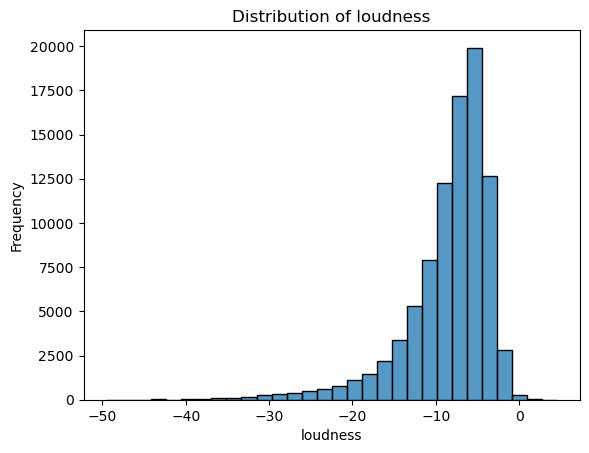

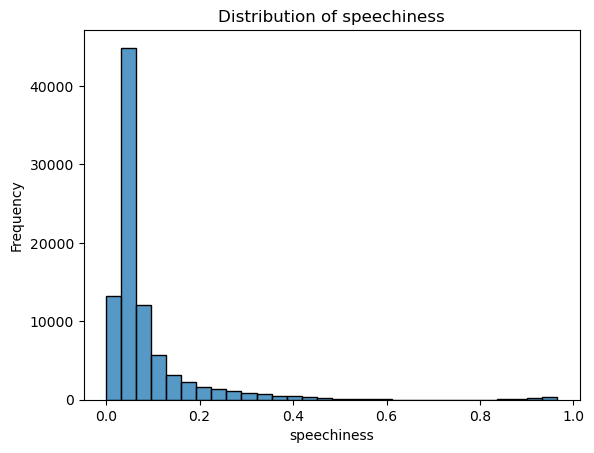

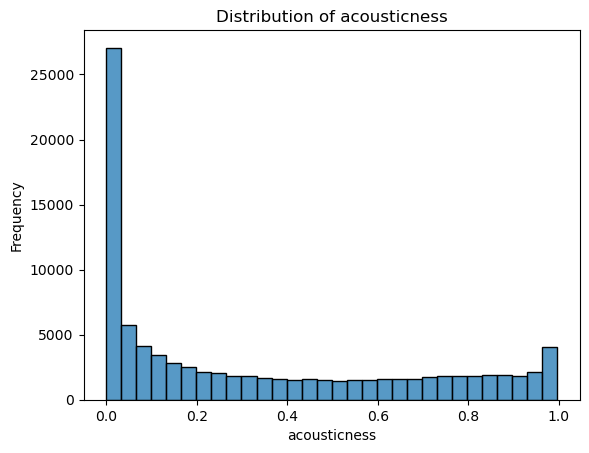

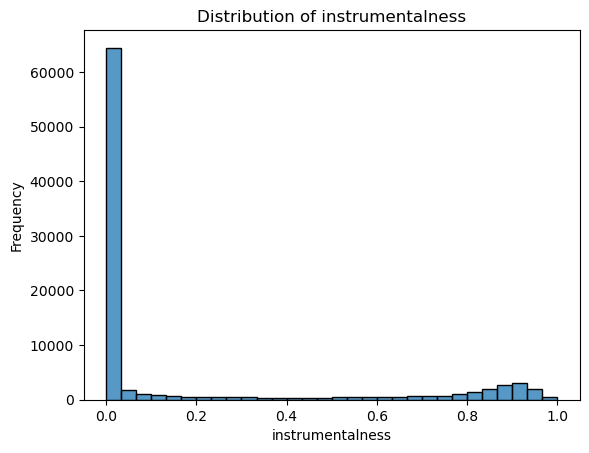

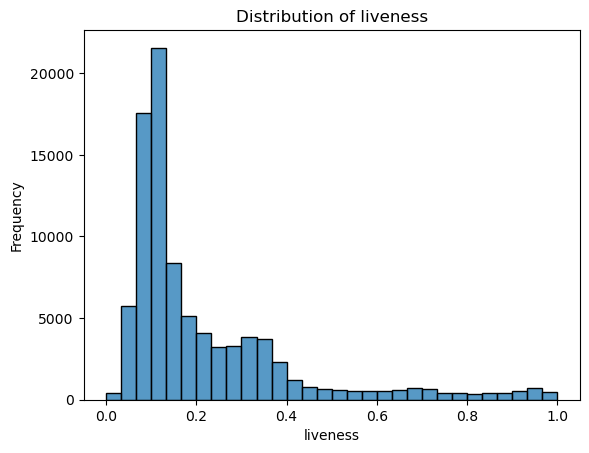

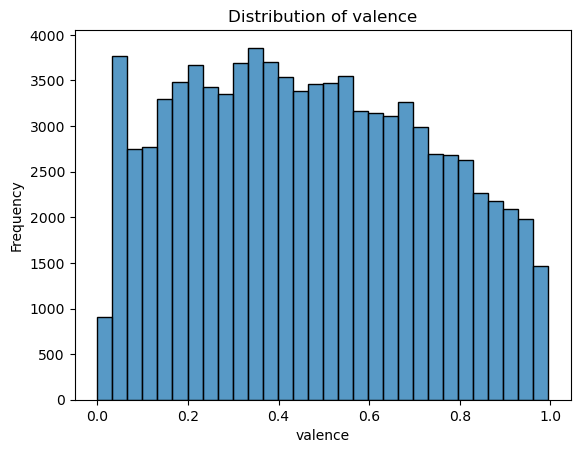

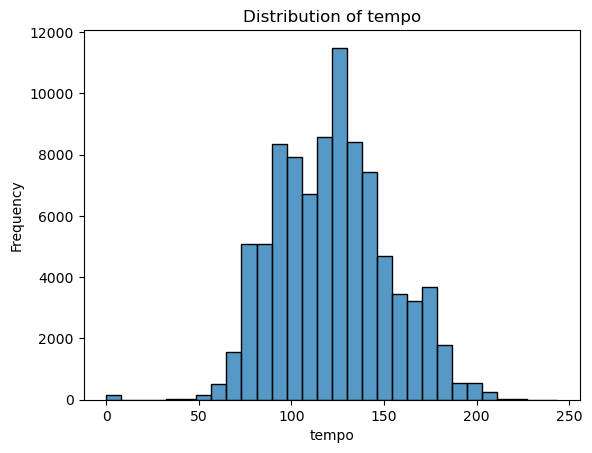

In [21]:
# Make histograms for all numerical columns
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for column in numerical_columns:
    sns.histplot(df[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

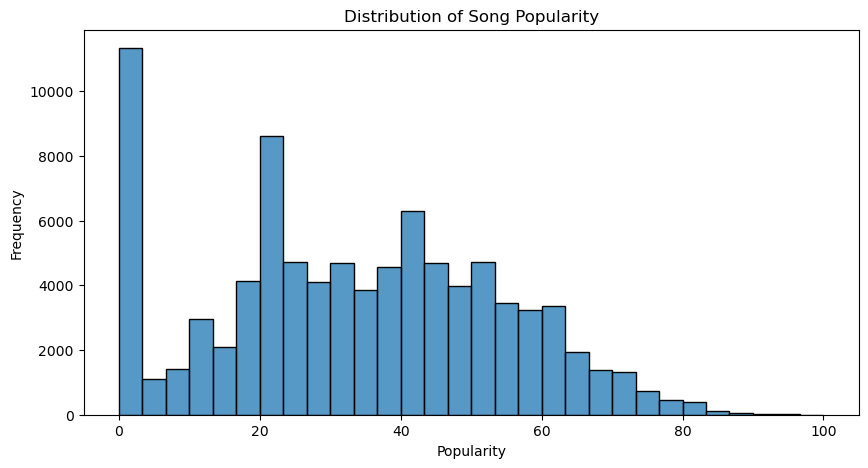

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], kde=False, bins=30)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

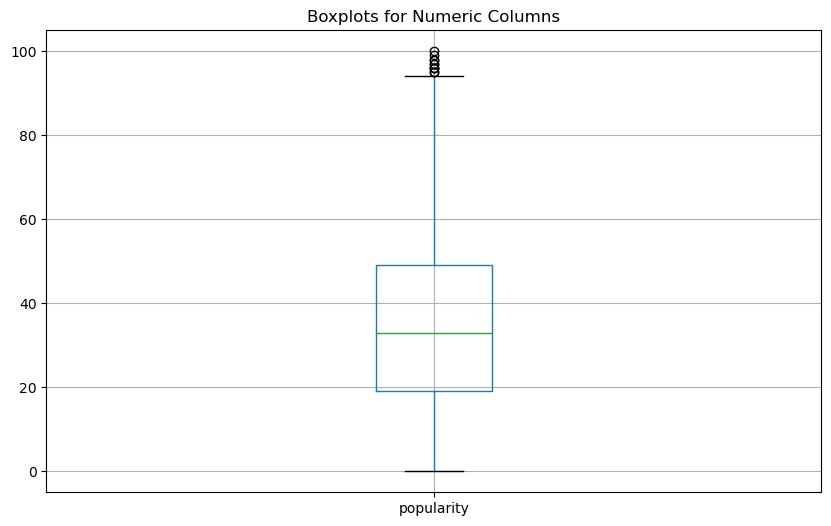

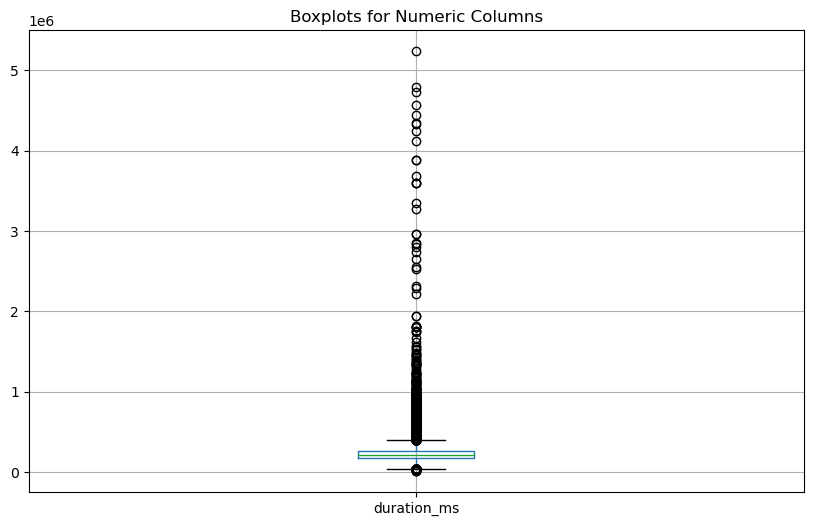

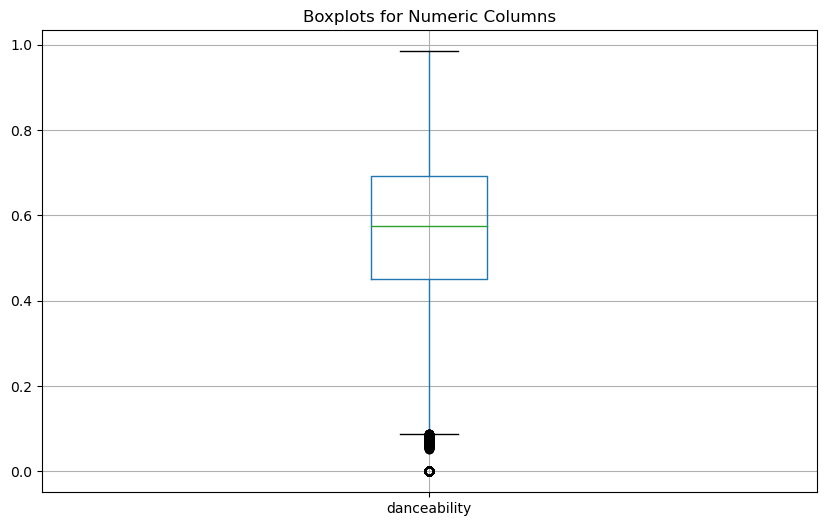

In [23]:
# We have created box plots for some of the numeric columns to detect outliers 
plt.figure(figsize=(10, 6))
df.boxplot(column=['popularity'])
plt.title("Boxplots for Numeric Columns")
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column=['duration_ms'])
plt.title("Boxplots for Numeric Columns")
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column=['danceability'])
plt.title("Boxplots for Numeric Columns")
plt.show()

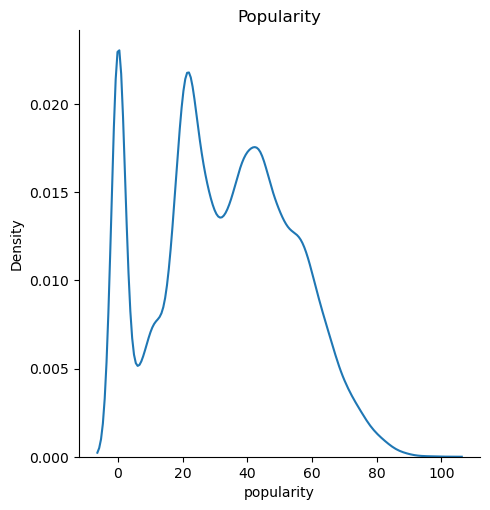

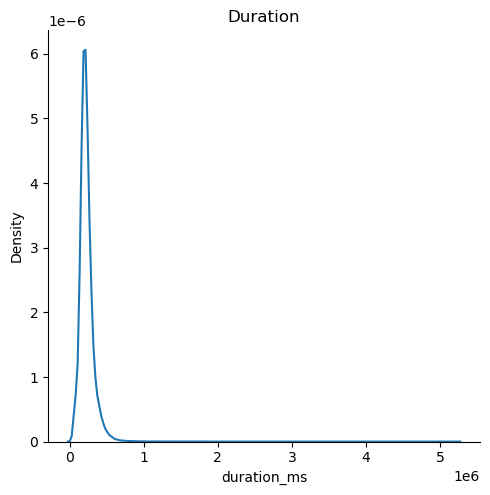

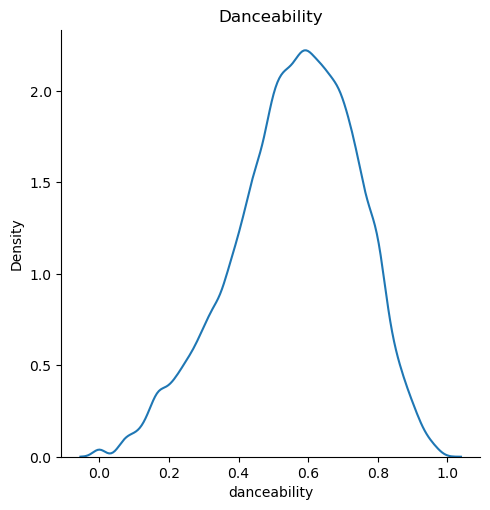

In [24]:
# What are the distributions of song popularity, duration_ms, and danceability? Use appropriate visualizations.
sns.displot(data=df,
            x="popularity",
            kind="kde").set(title='Popularity')
sns.displot(data=df,
            x="duration_ms",
            kind="kde").set(title='Duration')
sns.displot(data=df,
            x="danceability",
            kind="kde").set(title='Danceability')

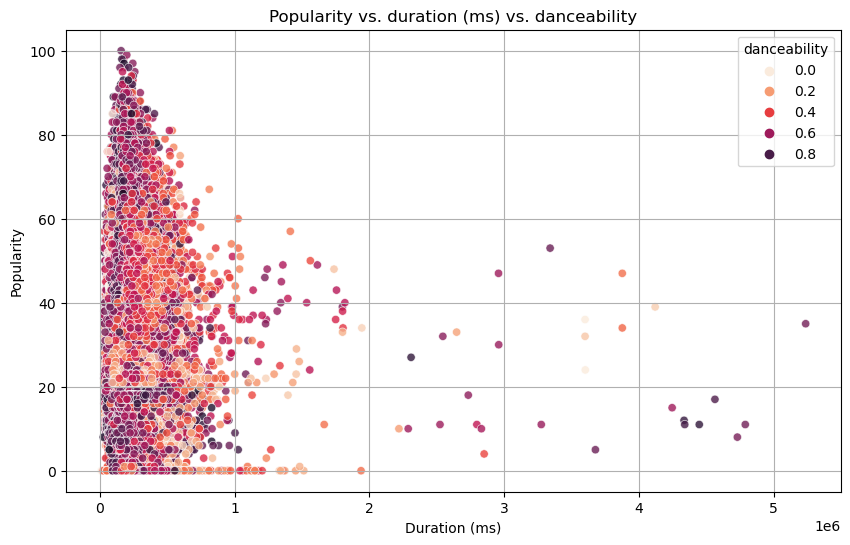

In [25]:
# We can also make a scatter plot with hue on top to have all of the three variables in one visual.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], hue=df['danceability'], palette="rocket_r", alpha=0.8)

plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. duration (ms) vs. danceability')
plt.grid(True)

plt.show()

In [26]:
# How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)
# To calculate the number of different genres print the below
unique_genres = df['track_genre'].nunique()
print("Number of unique genres:", unique_genres)

Number of unique genres: 113


In [27]:
# For listing the genre in a list 
unique_values = df['track_genre'].unique()
unique_values
print("Unique Values in 'track_genre':")
for value in unique_values:
    print(f"- {value}")

Unique Values in 'track_genre':
- acoustic
- afrobeat
- alt-rock
- alternative
- ambient
- anime
- black-metal
- bluegrass
- blues
- brazil
- breakbeat
- british
- cantopop
- chicago-house
- children
- chill
- classical
- club
- comedy
- country
- dance
- dancehall
- death-metal
- deep-house
- detroit-techno
- disco
- disney
- drum-and-bass
- dub
- dubstep
- edm
- electro
- electronic
- emo
- folk
- forro
- french
- funk
- garage
- german
- gospel
- goth
- grindcore
- groove
- grunge
- guitar
- happy
- hard-rock
- hardcore
- hardstyle
- heavy-metal
- hip-hop
- honky-tonk
- house
- idm
- indian
- indie-pop
- indie
- industrial
- iranian
- j-dance
- j-idol
- j-pop
- j-rock
- jazz
- k-pop
- kids
- latin
- latino
- malay
- mandopop
- metal
- metalcore
- minimal-techno
- mpb
- new-age
- opera
- pagode
- party
- piano
- pop-film
- pop
- power-pop
- progressive-house
- psych-rock
- punk-rock
- punk
- r-n-b
- reggae
- reggaeton
- rock-n-roll
- rock
- rockabilly
- romance
- sad
- salsa
- samba


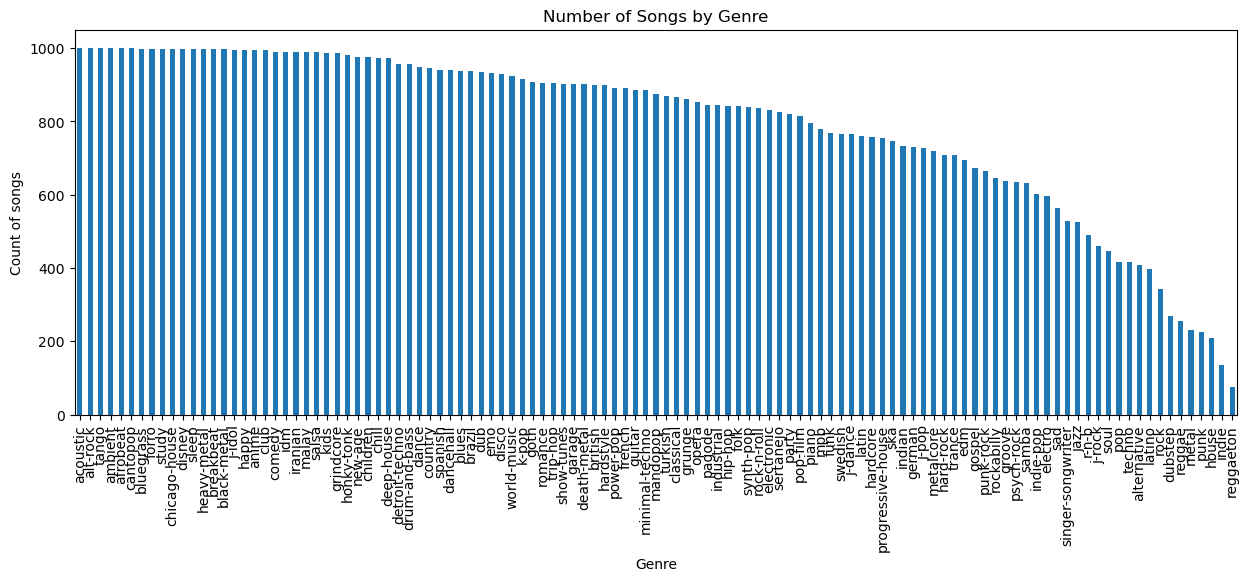

In [28]:
# Visualize the number of songs by genre. Which are the most common genres?
# There is 1000 song in each genre so all genres are equally represented in the dataset.
genre_counts = df['track_genre'].value_counts()

plt.figure(figsize=(15, 5))
genre_counts.plot(kind='bar')

plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of songs')
plt.xticks(rotation=90) # Here we have rotated the x-axis labels for better readability

plt.show()

In [29]:
# List the top 20. (Explain how you choose to list the top 20)
top_20_popular_genres = popularity.head(20).index
top_20_popular_genres

Index(['k-pop', 'pop-film', 'metal', 'chill', 'latino', 'sad', 'grunge',
       'indian', 'anime', 'emo', 'reggaeton', 'sertanejo', 'piano',
       'progressive-house', 'hard-rock', 'pagode', 'deep-house', 'mandopop',
       'british', 'metalcore'],
      dtype='object', name='track_genre')

In [30]:
# If we want to make a column in the df which shows the rank, we can follow the below steps.

## Group by 'track_genre' and calculate the average popularity for each genre
genre_popularity_rank = df.groupby('track_genre')['popularity'].mean().reset_index()

df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

## Rank genres by popularity in descending order
genre_popularity_rank['popularity_rank'] = genre_popularity_rank['popularity'].rank(ascending=False, method='min')

## Sort the DataFrame by popularity rank
genre_popularity_rank = genre_popularity_rank.sort_values(by='popularity_rank')

# Display the rank
genre_popularity_rank

,track_genre,popularity,popularity_rank
65,k-pop,59.423581,1.0
81,pop-film,59.096933,2.0
71,metal,56.422414,3.0
15,chill,53.738683,4.0
68,latino,51.788945,5.0
...,...,...,...
24,detroit-techno,11.130753,109.0
67,latin,9.855072,110.0
64,jazz,9.790076,111.0
93,romance,3.549779,112.0


In [31]:
## Merge the popularity rank DataFrame with the original DataFrame
df = df.merge(genre_popularity_rank[['track_genre', 'popularity_rank']], on='track_genre', how='left')

## Display the updated DataFrame
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_rank
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,25.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,25.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,25.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,25.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,25.0


In [32]:
# Make a filtered_data (df) for only analyzing on the must popular genres
filtered_data = df[df['track_genre'].isin(top_20_popular_genres)]

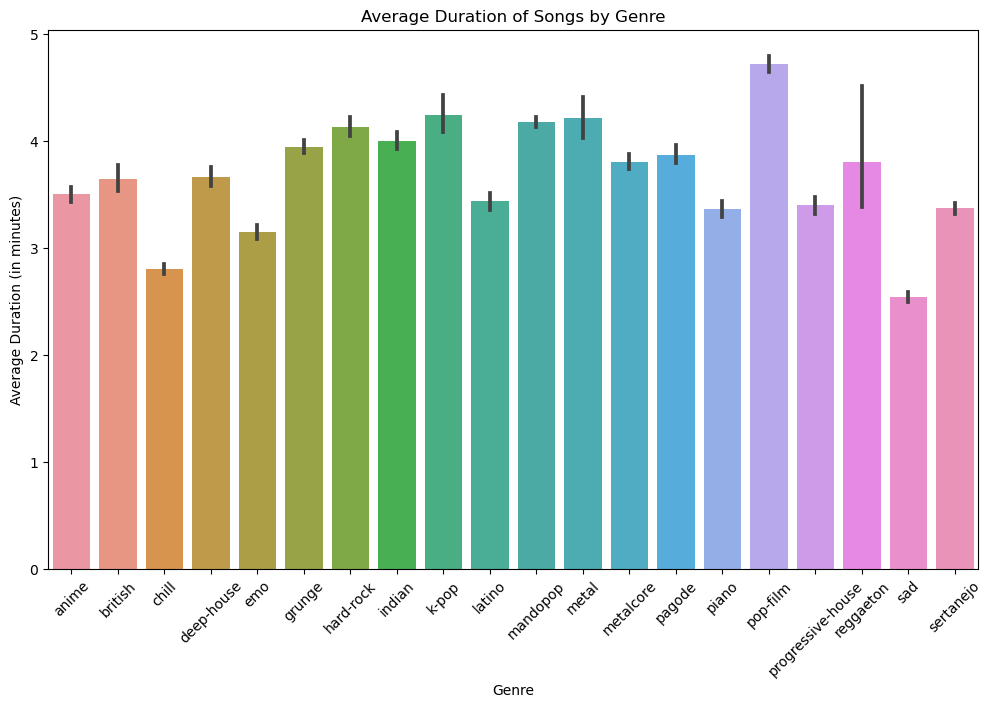

In [33]:
# Plot 'Average Duration of Songs by Genre' as a barblot
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['duration_ms']/60000)  # Convert to minutes
plt.title('Average Duration of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (in minutes)')
plt.xticks(rotation=45)
plt.show()

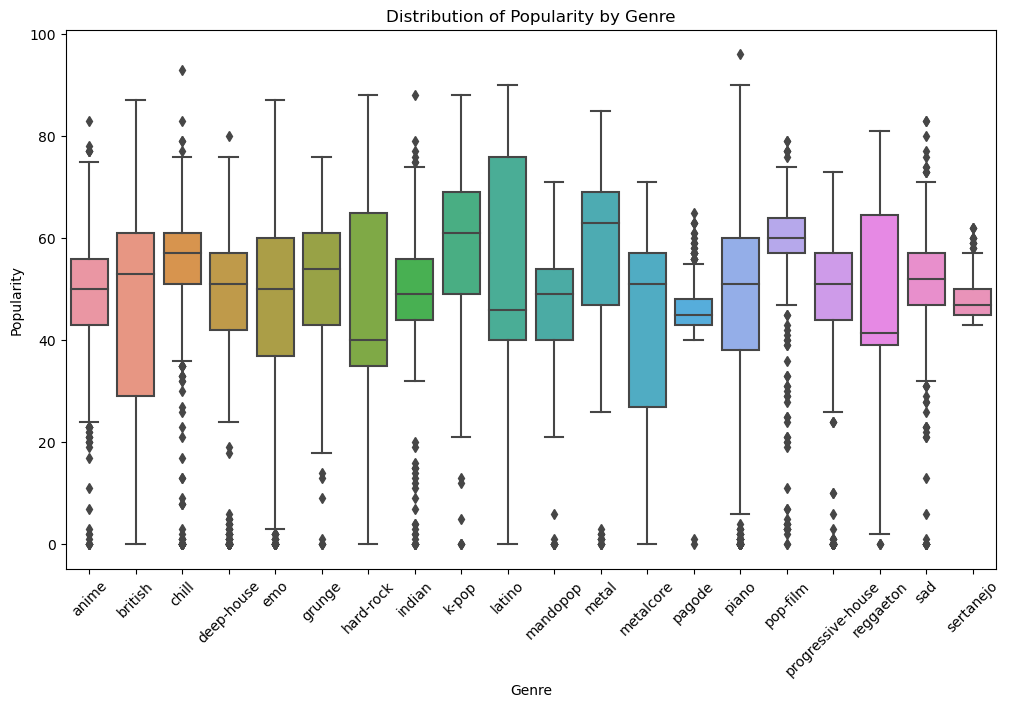

In [34]:
# Distribution of Popularity by Genre as a boxplot to see the difference and maybe outliers
plt.figure(figsize=(12,7))
sns.boxplot(x=filtered_data['track_genre'], y=filtered_data['popularity'])
plt.title('Distribution of Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Dance value is low for ex opera, sleep and so on which is expected
dance = filtered_data.groupby('track_genre')['danceability'].mean().sort_values(ascending=False)
dance

track_genre
latino               0.755487
reggaeton            0.743284
deep-house           0.710730
sad                  0.701801
chill                0.666423
k-pop                0.641783
progressive-house    0.616650
emo                  0.601147
sertanejo            0.593238
pop-film             0.591431
indian               0.585930
pagode               0.564202
mandopop             0.547379
anime                0.537666
british              0.503564
metal                0.481177
hard-rock            0.479286
piano                0.463433
grunge               0.455414
metalcore            0.427091
Name: danceability, dtype: float64

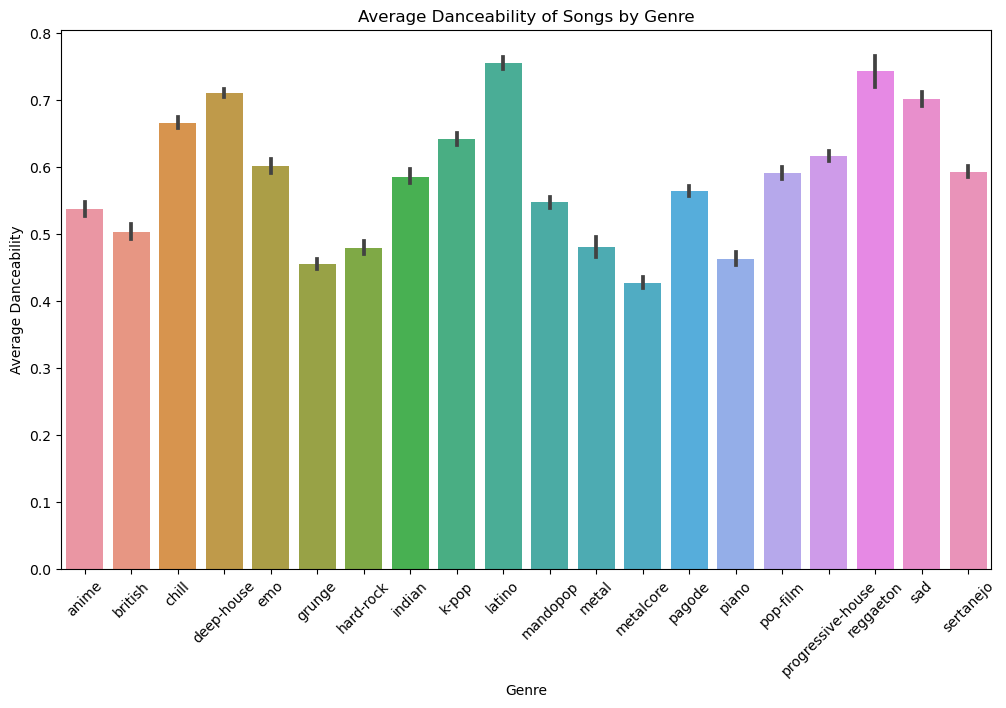

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['danceability'])
plt.title('Average Danceability of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?
energy = filtered_data.groupby('track_genre')['energy'].mean().sort_values(ascending=False)
energy

track_genre
metalcore            0.902281
metal                0.841392
progressive-house    0.821759
hard-rock            0.807106
grunge               0.804870
deep-house           0.741378
reggaeton            0.737473
pagode               0.712383
latino               0.712343
sertanejo            0.702314
k-pop                0.682796
anime                0.674229
emo                  0.667745
pop-film             0.599897
indian               0.554673
mandopop             0.509455
british              0.501523
sad                  0.478868
chill                0.429531
piano                0.342006
Name: energy, dtype: float64

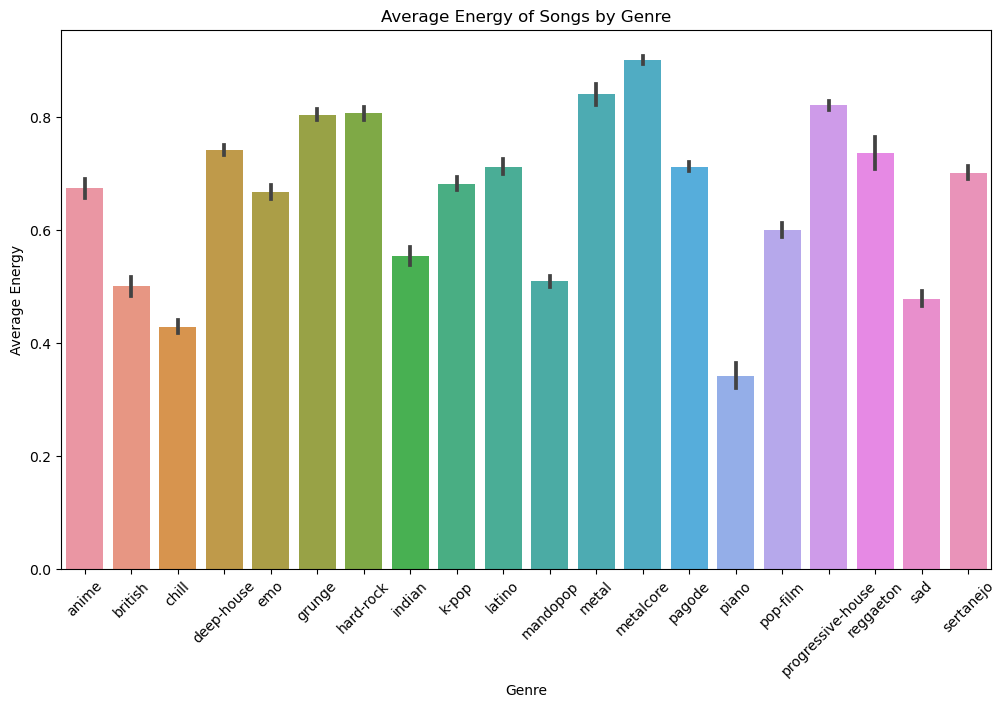

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['energy'])
plt.title('Average Energy of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)
plt.show()

In [39]:
# 1 milliseconds (ms) is equal to 1.666667×10^-5 minutes (min). 
# Conversely, 1 minutes (min) is equal to 60000 milliseconds (ms).

# Therefore, we have divided the milliseconds column with 6000 to get the duration in minutes
filtered_data['duration_minutes'] = filtered_data['duration_ms'] / 60000

# As below we can se a noticeable differences for the duration between the different genres
duration_minutes = filtered_data.groupby('track_genre')['duration_minutes'].mean().sort_values(ascending=False)
duration_minutes

/var/folders/hn/x1r36wjd33b11q4x03t54rh40000gn/T/ipykernel_15181/553905156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['duration_minutes'] = filtered_data['duration_ms'] / 60000


track_genre
pop-film             4.715825
k-pop                4.243450
metal                4.207982
mandopop             4.178121
hard-rock            4.131132
indian               3.998571
grunge               3.944070
pagode               3.868397
metalcore            3.805170
reggaeton            3.800810
deep-house           3.657501
british              3.642048
anime                3.498992
latino               3.432935
progressive-house    3.395365
sertanejo            3.368924
piano                3.361960
emo                  3.149679
chill                2.805175
sad                  2.541261
Name: duration_minutes, dtype: float64

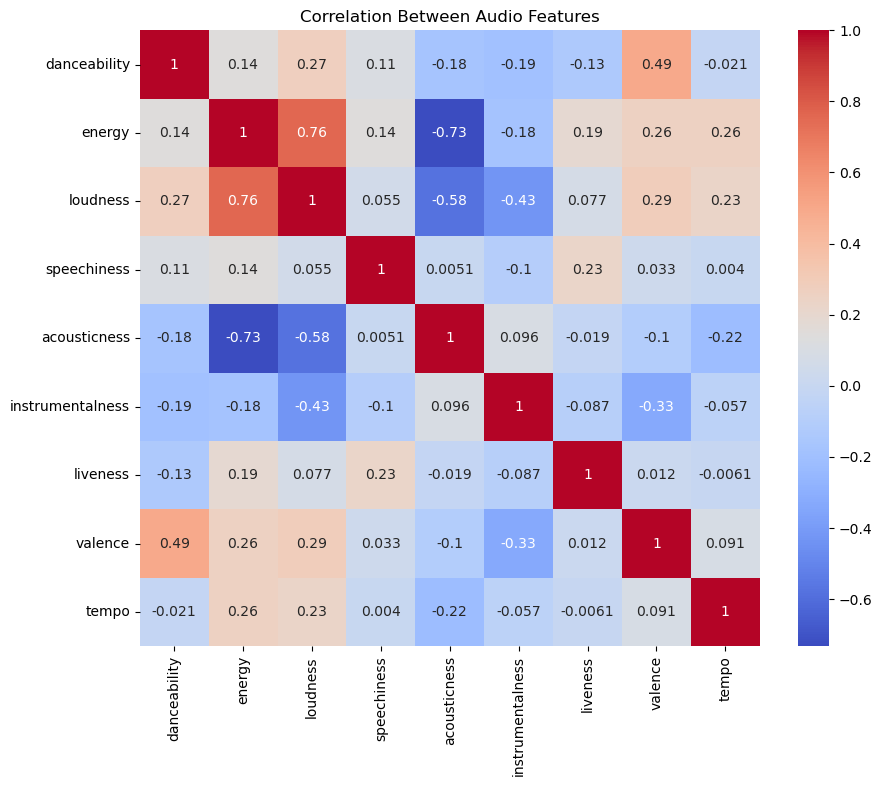

In [40]:
# Make a headmap fir all the audio_features to explore any correlation 
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
correlation = df[audio_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

#We can tell on the heatmap that loudness and tempo is correlating a bit and loudness and danceability correlates more.

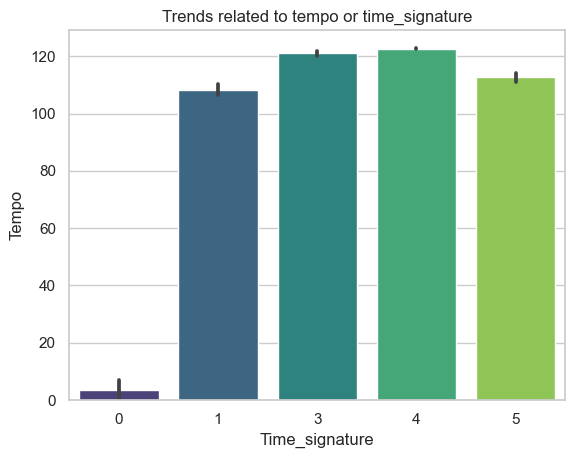

In [66]:
tempo_time = df.loc[:, ['tempo', 'time_signature']]

# Create a barplot using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x='time_signature', y='tempo', data=tempo_time, palette="viridis")

# Add labels and title
plt.xlabel('Time_signature')
plt.ylabel('Tempo')
plt.title('Trends related to tempo or time_signature')

# Show the barplot
plt.show()

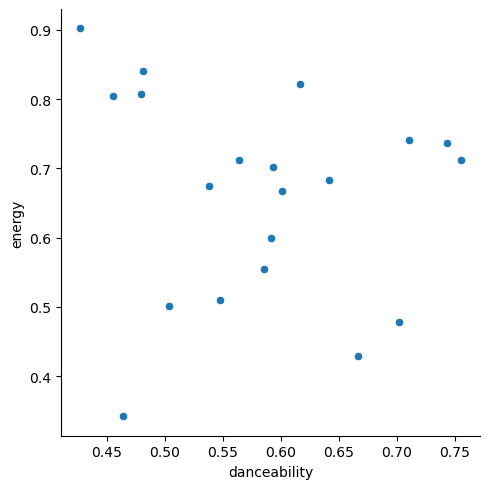

In [41]:
# Investigate the relationship between danceability and energy. Do songs that are more danceable tend to have more energy? Use a scatter plot.
sns.relplot(data=df,
            x=dance,
            y=energy,
            kind="scatter")

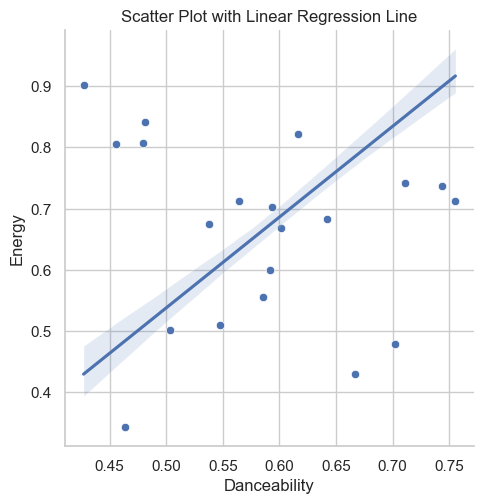

In [42]:
# We can also make a scatterplot wiht a linear regression line to see the relationship between danceability and energy

# Set the sns.set to style="whitegrid" to get gridlines
# Set the Seaborn style to 'ggplot'
sns.set(style="whitegrid")

# Create a scatter plot with sns.relplot
scatter_plot_dance_energy = sns.relplot(data=df, x=dance, y=energy, kind="scatter")

# Add a linear regression line using sns.regplot
sns.regplot(data=df, x=dance, y=energy, scatter=False, ax=scatter_plot_dance_energy.ax)

# Optional: Customize the plot
plt.title("Scatter Plot with Linear Regression Line")
plt.xlabel("Danceability")
plt.ylabel("Energy")

# Show the plot
plt.show()

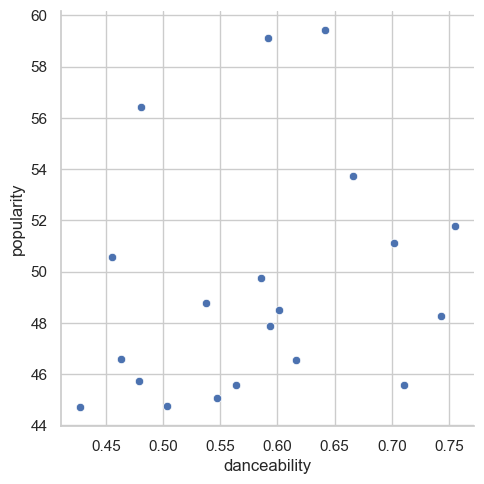

In [43]:
# How does song popularity relate to other characteristics like danceability, loudness, or tempo?
sns.relplot(data=df,
            x=dance,
            y=popularity,
            kind="scatter")

In [44]:
# How do explicit songs compare to non-explicit ones in terms of popularity or other characteristics?
# First we group data into explicit and non-explicit songs

explicit_songs = df[df['explicit'] == True]  # Select rows where 'explicit' is True
non_explicit_songs = df[df['explicit'] == False]  # Select rows where 'explicit' is False

# Compare popularity using summary statistics
explicit_popularity_mean = explicit_songs['popularity'].mean()
non_explicit_popularity_mean = non_explicit_songs['popularity'].mean()

# Print the mean popularity for explicit and non-explicit songs
print(f"Mean Popularity for Explicit Songs: {explicit_popularity_mean}")
print(f"Mean Popularity for Non-Explicit Songs: {non_explicit_popularity_mean}")

Mean Popularity for Explicit Songs: 36.88564382139148
Mean Popularity for Non-Explicit Songs: 32.852576917450875


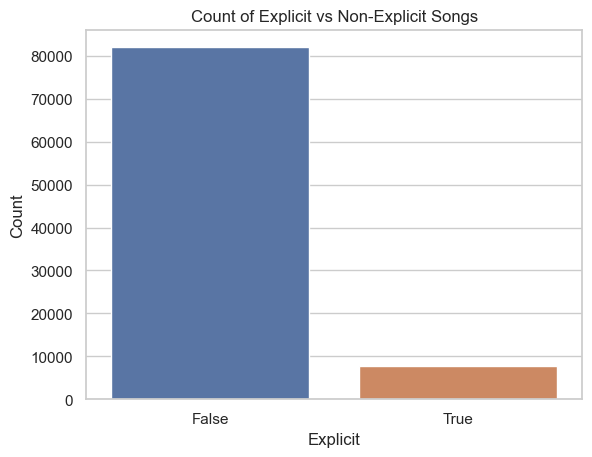

In [45]:
sns.countplot(x=df['explicit'])
plt.title('Count of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

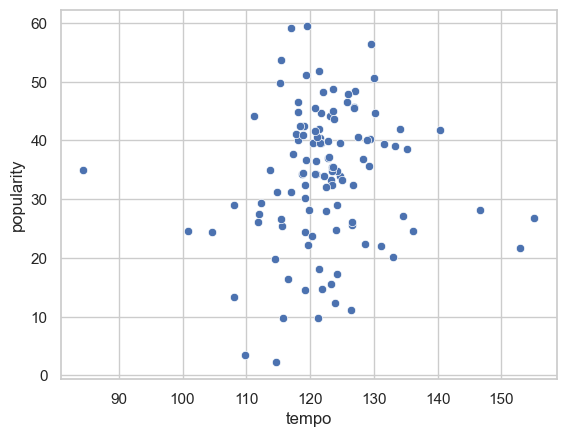

In [46]:
# Are there any trends related to tempo or time_signature?

# As we can see from be bleow one the sweetspot looks like to se at tempo 110-130.
tempo = df.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=tempo, y=popularity)
plt.show()

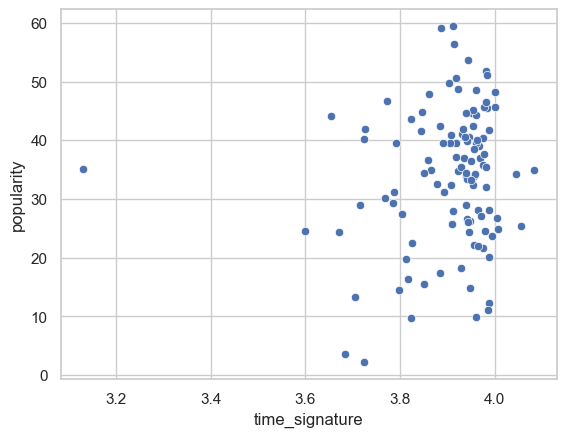

In [47]:
# Plot for time_signature
time_signature = df.groupby('track_genre')['time_signature'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=time_signature, y=popularity)
plt.show()

# Part 2

## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [48]:
# Importing StandardScaler from scikit-learn (sklearn)
from sklearn.preprocessing import StandardScaler

# Importing PCA (Principal Component Analysis) from scikit-learn (sklearn)
from sklearn.decomposition import PCA

# Importing KMeans clustering algorithm from scikit-learn (sklearn)
from sklearn.cluster import KMeans

# Importing LabelEncoder from scikit-learn (sklearn)
from sklearn.preprocessing import LabelEncoder

In [49]:
# We select the below features from the dataframe
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new DataFrame with the selected columns
X = df[features]

In [50]:
# One-hot encode the 'track_genre' column
encoded_genres = pd.get_dummies(df['track_genre'], prefix='genre')
encoded_genres

,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_brazil,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# Append the encoded data to the original dataframe and drop the original 'track_genre' column
data_encoded = pd.concat([df, encoded_genres], axis=1).drop('track_genre', axis=1)
data_encoded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0,0,0,0,0,0,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0,0,0,0,0,0,0,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0,0,0,0,0,0,0,0,0,1
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0,0,0,0,0,0,0,0,1
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0,0,0,0,0,0,0,0,1
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,0,0,0,0,0,0,0,0,0,1


In [52]:
# Standardize the dataset since PCA is sensitive to the magnitude of the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Conducting the PCA model and fit_transform it to te X_scaled (StandardScaler data = features)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

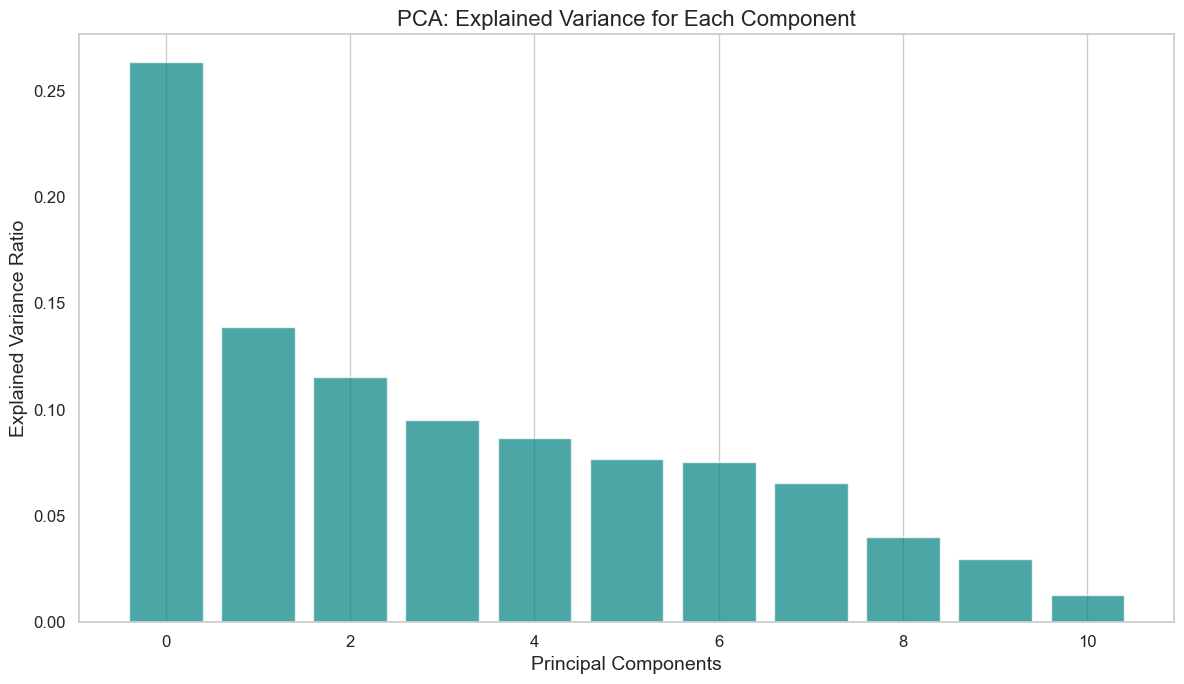

In [54]:
# Visualizing explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [55]:
# Conduct a PCA on the song characteristics. We are doing this to make the dimensions reducing for visualization purposes
# We are reducing it to 2 components

# Create a PCA instance with the desired number of components

# Choose the number of components you want to keep
n_components = 2 
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data to the principal components
X_pca = pca.fit_transform(X_scaled)

Explained Variance Ratios: [0.26332891 0.13876463]


In [68]:
# We have reducing the dimensions to only two
X_pca.shape

(89740, 2)

In [69]:
# Visualize the explained variance for each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.26332891 0.13876463]


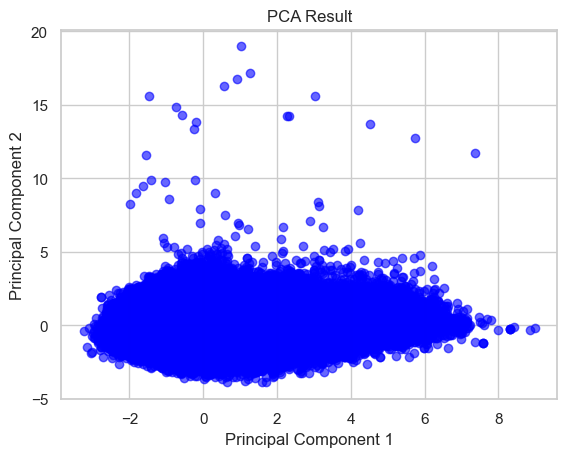

In [56]:
# Reduce the dataset's dimensions based on the PCA results and visualize the data in the reduced dimension space.
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, color='blue')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

plt.show()

In [57]:
# Choose a clustering algorithm (e.g., KMeans, DBSCAN, or Hierarchical).

## We're using the Kmeans because we have a lot of datapoints.

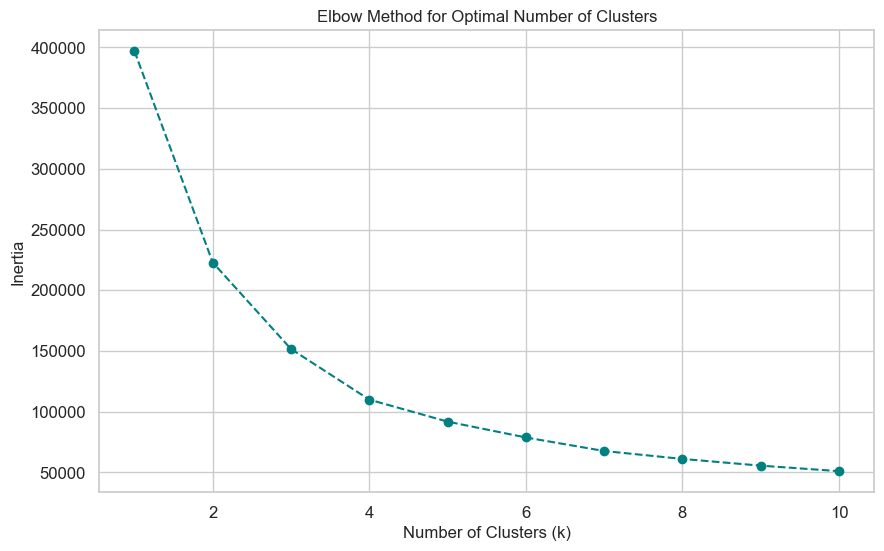

In [58]:
# Determine the optimal number of clusters (if needed, like in KMeans). explain how you get to that number of clusters

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize variables
clusters = []
k_range = range(1, 11)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    clusters.append(kmeans.inertia_)

# Plot the Elbow method graph (sum of squared distances for each 'k')
plt.figure(figsize=(10, 6))
plt.plot(k_range, clusters, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [70]:
# Conducting KMeans clustering (assuming 4 clusters from the elbow method)
n_cluster=4
kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(X_pca)
labels = kmeans.labels_

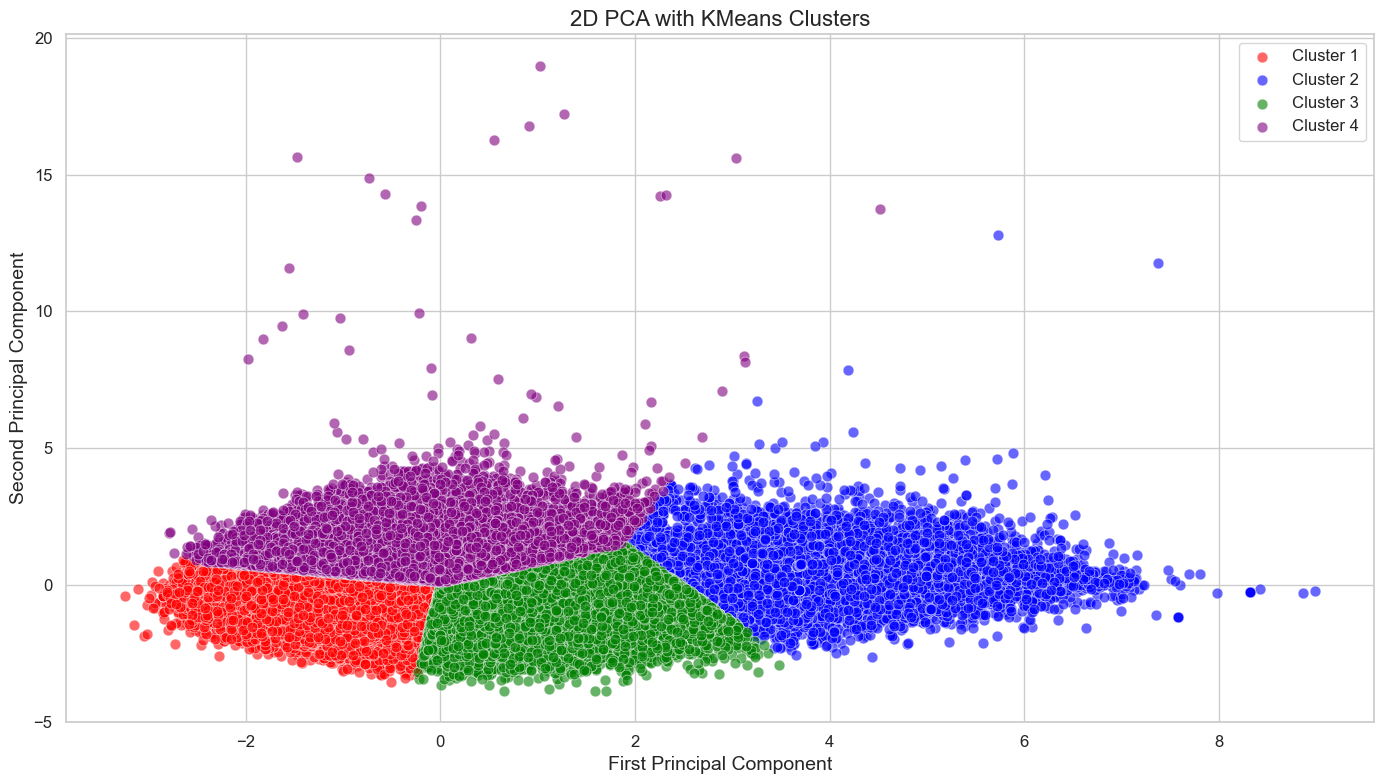

In [72]:
# Visualizing clusters
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(14,8))
for i, color, label in zip(range(4), colors, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=60, c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 3

## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

Build the Recommender:

  Create a function that takes a song name as input and outputs a list of songs recommended based on textual similarity. For this, you'll use the cosine similarity scores.

In [ ]:
# Import the liberarys
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as ss
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Refine the Textual Data: Consider merging multiple textual columns (e.g., artist name + track name) to generate recommendations based on combined textual data.

# Merge 'artists' and 'track_name' columns with a separator
df['song_artist'] = df['artists'] + ' - ' + df['track_name']

# Display the DataFrame with the new 'combined_text' column
df[['artists', 'track_name', 'song_artist']]

In [ ]:
# Make the track name to title
title = df['track_name']

In [ ]:
# Create a TF-IDF vectorizer to transform song titles into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['song_artist'])

In [ ]:
# Compute the cosine similarity between song titles
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

In [ ]:
# Find the index of the song with the given title
df.index[df['track_name'] == "As It Was"].tolist()[0]

In [ ]:
# Calculate cosine similarities between the selected song and all other songs
a = list(enumerate(cosine_sim[161]))

In [ ]:
# Sort the songs by their similarity scores in descending order
b = sorted(a, key=lambda x: x[1], reverse=True)

In [ ]:
# Get the top 10 most similar songs (excluding the input song itself)
c = b[1:11]
c

In [ ]:
# Get the indices of the top 10 similar songs
d = [i[0] for i in c]

# Return the titles of the top 10 similar songs
df['track_name'].iloc[d]

In [ ]:
# Function to get song recommendations based on a given title
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Find the index of the song with the given title
    idx = df.index[df['track_name'] == title].tolist()[0]

    # Calculate cosine similarities between the selected song and all other songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs by their similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar songs (excluding the input song itself)
    sim_scores = sim_scores[1:11]

    # Get the indices of the top 10 similar songs
    song_indices = [i[0] for i in sim_scores]

    # Return the titles of the top 10 similar songs
    return df['track_name'].iloc[song_indices]

In [ ]:
# Example: Get recommendations for a song title
recommendations = get_recommendations("As It Was")
print(recommendations)